In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import norm 
import math, random

In [38]:
def Brownian(size):
    normdisx = np.random.normal(0, 0.001, size)
    normdisy = np.random.normal(0, 0.001, size)
    normdisx = np.cumsum(normdisx)
    normdisy = np.cumsum(normdisy)
    return normdisx, normdisy

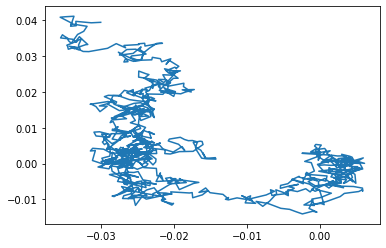

In [39]:
time = np.linspace(0, 1, 1000)
xdis, ydis = twoDBrownian(len(time))
plt.plot(xdis, ydis)

In [40]:
# Solve Langevin Diffusion Stochastic Differential Equation
def Langevin(xk, df, h=0.001):
    # xk = position
    # df = lamda function
    # x_k1 = next iteration
    xk = xk.astype(float)
    drift = np.array([h*df[0](xk[0], xk[1]), h*df[1](xk[0], xk[1])])
    noise = np.array([np.sqrt(2*h)*np.random.normal(0, 1), np.sqrt(2*h)*np.random.normal(0, 1)])
    x_k1 = xk - drift + noise
    return x_k1  

In [41]:
# Produce Markov Chain displacement sequence of a particle
def MarkovChain(xk, num, df, absorb=True):
    disx = np.array([xk[0]])
    disy = np.array([xk[1]])
    # reflected points [x,y, x,y, x,y ...]
    reflected = np.array([], dtype=np.float64)
    for i in range(0, num - 1, 1):
        previous_xk = xk
        xk = Langevin(xk, df)
        if norm(xk) > 1.0 and absorb:                  ## absorbing boundary
            return disX, disY
        elif not absorb and norm(xk) > 1.0:            ## reflecting boundary
            reflected = np.append(reflected, previous_xk[0])
            reflected = np.append(reflected, previous_xk[1])
            xk = previous_xk
        disx = np.append(disx, xk[0])
        disy = np.append(disy, xk[1])
    return disx, disy, reflected

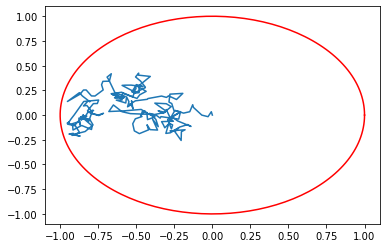

In [42]:
# Absorbing ball boundary and 2d langevin equation
f = lambda x1, x2: -1.0*np.log(1 - x1**2 - x2**2)
df_x1 = lambda x1, x2: 2.0*x1/(1 - x1**2 - x2**2)
df_x2 = lambda x1, x2: 2.0*x2/(1 - x1**2 - x2**2)
df = np.array([df_x1, df_x2])


initPos = np.array([0,0])
disx, disy = MarkovChain(initPos, 10000, df)
plt.plot(disx, disy)

#draw circle
u = np.mgrid[0:2*np.pi:200j]
x=np.cos(u)
y=np.sin(u)
plt.plot(x, y, color="r")
